In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import cv2

In [3]:
# Testing the os path join with directory and filling in the different classes of Brain Tumor in categories. 
dir1 = ('Color_classification/Color')
categories = []

for file in os.listdir(dir1):
    categories.append(file)
    
for i in categories:
    file_path = os.path.join(dir1,i)
    
    for file in os.listdir(file_path):
        img_path = os.path.join(file_path, file)
        image = cv2.imread(img_path)

['Black', 'Blue', 'Brown', 'Green', 'Orange', 'Red', 'Violet', 'White']
(235, 214, 3)


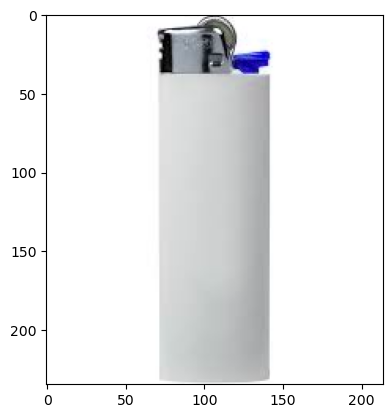

In [4]:
plt.imshow(image)
print(categories)
print(image.shape)

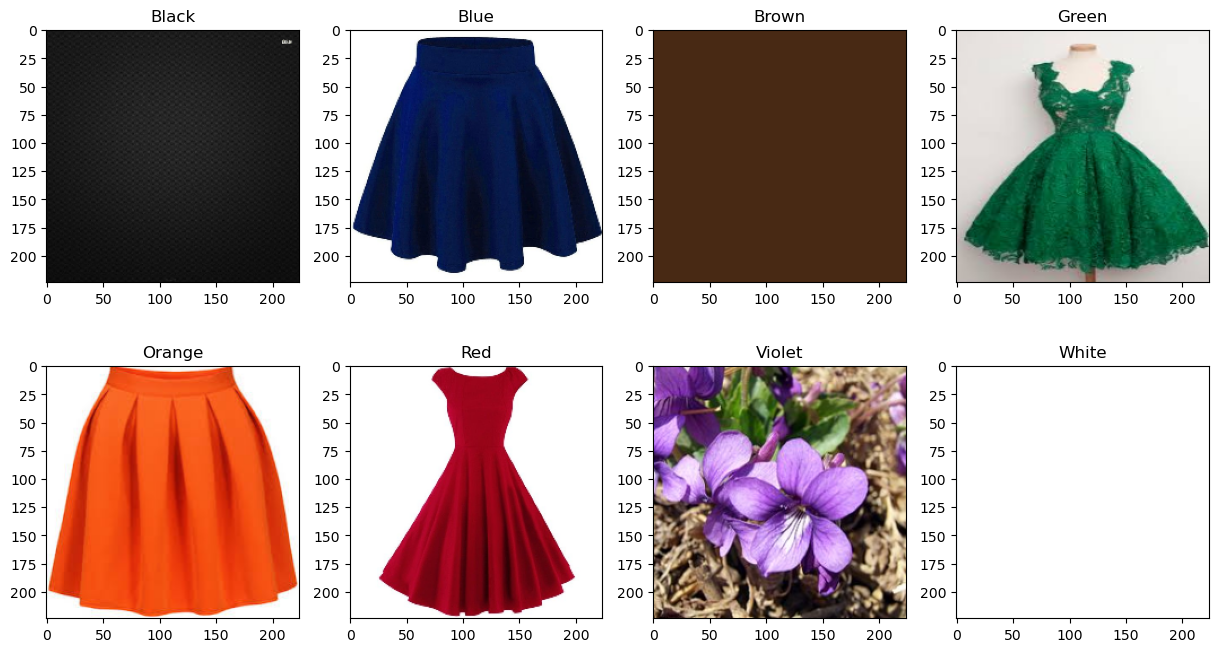

In [5]:
# Sample Pictures
plt.figure(figsize=(15,8))

img_path = ['/Black/1.jpg', '/Blue/1.jpg', '/Brown/1.jpg', '/Green/1.jpg', '/Orange/1.jpg', '/Red/1.jpg', '/Violet/1.jpg', '/White/1.jpg']

for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    img = cv2.imread(dir1 + img_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(categories[i])

In [6]:
# Creating and resizing the data array for the training and testing sets. 
training_path = ('Color_classification/Color')
test_path = ('Color_classification/testimg')

training_data = []
test_data = []

def create_data(path, data):
    for category in categories:
        file = os.path.join(path, category)
        class_num = categories.index(category)
        for img in os.listdir(file):
            img_array = cv2.imread(os.path.join(file,img))
            new_array = cv2.resize(img_array,(128,128))
            data.append([new_array, class_num])
create_data(training_path, training_data)
create_data(test_path, test_data)

In [7]:
# Length of the training and testing sets
lenoftraining = len(training_data)
lenoftest = len(test_data)
print(lenoftraining,lenoftest)

107 62


In [8]:
# Seperating the features and ouput classes. 
un_X_train = []
Y_train = []
un_X_test = []
Y_test = []

for categories_1, label in training_data:
    un_X_train.append(categories_1)
    Y_train.append(label)
    
for categories_1,label in test_data:
    un_X_test.append(categories_1)
    Y_test.append(label)

In [9]:
# Reshaping the array to be used for processing. 
un_X_train = np.array(un_X_train).reshape(lenoftraining,-1)
Y_train = np.array(Y_train)
un_X_test = np.array(un_X_test).reshape(lenoftest,-1)
Y_test = np.array(Y_test)
print(un_X_train.shape, Y_train.shape, un_X_test.shape, Y_test.shape)

(107, 49152) (107,) (62, 49152) (62,)


In [10]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(un_X_train)
X_test_sc = sc.fit_transform(un_X_test)
model = SVC(kernel = 'linear', gamma = 'auto')
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
matrix = confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)
print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n", report)

Confusion Matrix: 
 [[ 4  0  0  0  0  0  0  0]
 [ 1  9  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 6  1  4  2  0  0  0  0]
 [ 0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  2  0  1  0  0  6  0]
 [ 0  0  0  0  0  0  0  6]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.36      1.00      0.53         4
           1       0.75      0.90      0.82        10
           2       0.00      0.00      0.00         1
           3       0.67      0.15      0.25        13
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        10
           6       1.00      0.67      0.80         9
           7       1.00      1.00      1.00         6

    accuracy                           0.74        62
   macro avg       0.71      0.72      0.67        62
weighted avg       0.82      0.74      0.73        62

